# Welcome to __PERFUMEme.py__ 🧪👃🧴⚛️⚗️

## Introduction
<div style="text-align: justify">
Perfumes are a part of our everyday lives—whether it’s a subtle floral hint or a bold, spicy statement, most people have a signature scent that others come to recognize them by. But have you ever wondered what’s actually in your favorite fragrance? Perfumes are complex mixtures of countless molecules, and each one plays a unique role in shaping the scent you love.

So how can you figure out which molecule is responsible for that special note in your perfume? And once you have a molecule in mind, how do you know if it’s safe, aromatic, or even used in other fragrances?

Meet __PERFUMEme.py__, — a Python package that helps demystify the chemistry behind your scent. Simply input a molecule, and the tool will tell you:

- Whether the molecule is fragrant or toxic
- Its key physical properties, such as boiling point
- How it evaporates over time, via an evaporation model
- And best of all, which perfumes (when data allows) contain that exact molecule

Unlock the secrets behind the scents — one molecule at a time.

The main chemistry involved in this work stems from organic chemistry and physical chemistry, with particular emphasis on volatility and evaporation behavior of molecules. A core part of the modeling relies on the Clausius–Clapeyron equation, which relates vapor pressure to temperature through the enthalpy of vaporization. This equation is expressed in the logarithmic form as: 

$$
    \ln(P) = -\frac{\Delta H_{\text{vap}}}{RT} + C
$$

where:

- $P$ is the vapor pressure (in mmHg)

- $ΔH_{vap}$ is the enthalpy of vaporization (J/mol)

- $R$ is the ideal gas constant (8.314 J/mol·K)

- $T$ is the absolute temperature (K)

- $C$ is a constant determined from known reference conditions

The evaporation rate is then modeled as an exponential decay inversely proportional to the vapor pressure:

$$
P(T) = \exp\left(C - \frac{\Delta H_{\text{vap}}}{RT}\right)
$$


Using this relation, a temperature-dependent vapor pressure curve is reconstructed, and a simplified model for __evaporation rate__ is applied. The evaporation is modeled as an exponential decay inversely proportional to vapor pressure:

$$
\text{evap\ rate}(t) = \exp\left(-\alpha \cdot \frac{t}{P(T)}\right)
$$

where $\alpha = 0.05$ is an empirically chosen scaling constant.

In cases where vapor pressure or enthalpy data are unavailable, a fallback model uses boiling point as a proxy for volatility, with a simplified decay function:

$$
\text{evap\ rate}(t) = \exp\left(-\beta \cdot \frac{t}{T_b / 10}\right)
$$

where $\beta = 0.2$ and $T_b$ is the boiling point in K.

</div>

## 🛠️ Project Overview
<div style="text-align: justify">
The __PERFUMEme__ project is a Python-based toolkit designed to bridge the gap between perfumery and cheminformatics by enabling structured, molecule-level exploration of commercial fragrances. Its primary function is to understand if a certain molecule is usable in the perfume industry and understand why or why not.

Perfumes are typically described by their olfactory notes (e.g., floral, woody, spicy) and ingredient names, but rarely include explicit chemical representations. This lack of molecular data limits the potential for computational analysis and machine learning applications in fragrance design. PERFUMEme addresses this issue by enabling users to convert perfume data—including name, brand, ingredient names, and scent notes—into a format enriched with chemical identifiers, suitable for further computational analysis, clustering, or visualization.

The package processes structured JSON input and performs the following key tasks:

- Queries PubChem using molecule names to retrieve SMILES strings
- Handles ambiguous or unrecognized molecule names with graceful fallbacks.
- Returns structured data that can be visualized and analyzed.

By combining publicly available molecular data with perfume metadata, PERFUMEme provides a foundation for exploring relationships between molecular composition and fragrance perception, opening the door to computational fragrance classification, similarity scoring, and even automated formulation tools. The typical user of this package would be fragrance chemists, cosmetic scientists, cheminformatics researchers, or curious enthusiasts with a background in organic or physical chemistry — especially those interested in functional groups and molecular volatility. 
</div>

## 🧰 Material and methods

### 🗂 Data Sources
<div style="text-align: justify">
Molecular data were retrieved from PubChem, a publicly accessible chemical database maintained by the National Center for Biotechnology Information (NCBI). The PubChem PUG REST API was used to access compound properties, such as their molecular names, SMILES strings, boiling point, enthalpy of vaporisation and pressure value.

The fragrance data, including perfume names, brands, notes, and associated molecules, were compiled manually and stored in a local JSON file. This file served as the data set for the perfume_molecule.py functions.

### 𝌤 Package Structure
The __PERFUMEme__ package was implemented in Python and organized into several functional modules:

- scraper.py: includes functions used to add the molecules listed in the perfumes in perfume.json to a new database and on to addtheir smiles from PubChem, used withodors.csv to add their respective odors (if they had smell).
- utils.py: contains utility functions for validating molecule data, handling API errors, and processing JSON inputs.
- data/: directory containing the JSON files with structured perfume and molecular data.

The package was developed to be modular, allowing users to integrate new data sources or extend the current capabilities without modifying core functions. For example, adding a molecule with its odor and SMILES to molecules.json.
</div>

## 📊 Results and discussions


### Functions in __utils.py__

##### 🧪 SMILES Extraction
<div style="text-align: justify">
The SMILES strings for each molecule are retrievable using the __get_smiles__ function. A casual user might not know the SMILES of the molecule they want to analyse, so this function makes it easier for them. It is also used in the __resolve_input_to_smiles_and_cid__ function. A simple example usage is presented below.
</div>

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src"))


from perfumeme.utils import get_smiles
citronellol_smiles= get_smiles("Citronellol")
print (citronellol_smiles)

CC(CCC=C(C)C)CCO


This function can handle API queries, error checking, and returns the results in a structured format.


##### 🧑‍🔧 Resolving the input
<div style="text-align: justify">
The function __resolve_input_to_smiles_and_cid__, used in the main functions, is what allows the user to input either a SMILES or the compound name. This is a function to make the main functions easier to use and accessable. It also uses the __get_cid_from_smiles__ function, which retrieves the PubChem Compound ID (CID) corresponding to a given SMILES string.

When developping the __main_functions__, the distinction between a molecule's name and its SMILES was done by looking at the first letter of the input. This raised a problem when the name of the molecule sarted with a "C" and if the SMILES didn't start with a "C" (like water for example). There is now a "try-first, fallback-on-exception" pattern to detect if the input is a SMILES or a molecule name.
</div>

#####  🧑‍🔬 Get the odor

This function is used in __scraper.py__ to get the odors of a molecule and add them to the database.

##### 🧑‍💻 Getting information from PubChem
<div style="text-align: justify">
The function __get_pubchem_description__ is used to get the descriptive information associated with a compound identified by its CID, such as general chemical information and properties. This description corresponds to the table presented at the top of the PubChem page. For example, this is what you can find on PubChem for the citronellol molecule, compared to the result of the function. Thanks to the example above, the SMILES for citronellol is known and can be used for this function. 
</div>

In [7]:
from perfumeme.utils import get_pubchem_description, get_cid_from_smiles
from IPython.display import display, HTML

citronellol_cid = get_cid_from_smiles(citronellol_smiles)

print("From PubChem website:")
screenshot_html = '<img width="400" alt="PubChem description of citronellol" src="https://github.com/mlacrx/perfumeme/blob/main/assets/citronellol_pubchem.png?raw=true">'
display(HTML(screenshot_html))
print(f"from function: {get_pubchem_description(citronellol_cid)}")

From PubChem website:


from function: [{'CID': 8842, 'Title': 'beta-CITRONELLOL, (+-)-'}, {'CID': 8842, 'Description': 'Citronellol is a monoterpenoid that is oct-6-ene substituted by a hydroxy group at position 1 and methyl groups at positions 3 and 7. It has a role as a plant metabolite.', 'DescriptionSourceName': 'ChEBI', 'DescriptionURL': 'https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:50462'}]


<div style="text-align: justify">
This function was used in __has_a_smell__, but due to the lack of standardization of PubChem, the information on the odor wasn't present for each molecule. Instead, this function was replaced with __get_pubchem_record_sections__.
</div>

<div style="text-align: justify">
The function __get_pubchem_record_sections__ gets the structured data sections for a compound from PubChem using its CID. It is used in several functions of the __main_functions.py__. It allows the functions to find the need information in the right section of the JSON.
</div>

These functions are essential for the successfull operation of the function.

### Function in __main_functions.py__
<div style="text-align: justify">
One of the main purposes of this package is to determine if a given molecule is usable in a perfume. Multiple factors need to be taken into account to determine this. Such as if the molecule has a smell, is too toxic for the skin and see if it will stay long enough.
</div>

#### 🌸 Does it have a smell?
<div style="text-align: justify">
The function __has_a_smell__ verifies if a given molecule is odorous. Thanks to the function __resolve_input_to_smiles_and_cid__, either the SMILES or the name of the molecule can be introduced in the input. This function returns __True__ if it does, and __False__ if it doesn't. But of course even without a smell, some molecules are present in perfumes.
</div>

#### ☠️ Is it toxic?
<div style="text-align: justify">
The function __is_toxic_skin__ determines with a bool, using the PubChem safety data, if a given compound is toxic on the skin. Even if it returns __False__, it doesn't rule out its use in a perfume, as sometimes it can still be used in a small concentration.
</div>

#### 📈 Evaporation trace
<div style="text-align: justify">
The function __evaporation_trace__ accomplishes multiple tasks. Its main goal is to plot the evaporation trace of the molecule using thermodynamic data from PubChem. This graph show the relative concentration as a function of time. This will then be used, in the function __usable_in_perfume__ to determine if the molecule is a base note, a heart note or a top note, based on the vapor pressure or boiling point. For this reason, __evaporation_trace__ also returns the vapor pressure at a certain temperature, the boiling point and the enthalpy of vaporisation of the entered molecule. Below is an example for citronellol. The plot of the evaporation trace doesn't appear right below the cell but instead it is saved as a png image. This is because it will be shown in __usable_in_perfume__ with the "note" annotation and there was no reason for the graph to appear twice. 
</div>

In [8]:
from perfumeme.main_functions import evaporation_trace

molecule = "citronellol"

vapor_pressure, boiling_point, vp_temp, enthalpy, image_path = evaporation_trace(molecule)

print(f"💨 Vapor Pressure: {vapor_pressure} mmHg")
print(f"🔥 Boiling Point: {boiling_point} °C")
print(f"🌡️ Vapor Pressure Measured at: {vp_temp} °C")
print(f"⚡ Enthalpy of Vaporization: {enthalpy} J/mol")



💨 Vapor Pressure: 0.04 mmHg
🔥 Boiling Point: 224.0 °C
🌡️ Vapor Pressure Measured at: 25 °C
⚡ Enthalpy of Vaporization: None J/mol


<div style="text-align: justify">
The function encountered a significant challenge due to the lack of standardization on PubChem’s web pages. Unlike other databases where the structure and presentation of information are consistent across all records, PubChem's molecule pages vary significantly depending on the compound. This inconsistency posed a problem when attempting to extract specific information, as the function needed to adapt to different page layouts and data formats. After numerous attempts with a variety of molecules, each displaying its data in unique ways, it became evident that a more flexible approach was necessary. Consequently, the function was restructured to handle these discrepancies, incorporating logic to process the different ways in which PubChem presents its information. This modification allowed the function to accept all possible formats and return the correct data, regardless of the molecule's page structure.
</div>

#### 🤔 So... can we use this molecule?
<div style="text-align: justify">
The function __usable_in_perfume__ evaluates whether a molecule is suitable for use in perfume formulations. It evaluates three key criteria to assess a molecule's suitability for perfumery: whether it has a detectable odor, whether it is safe for skin contact, and whether its volatility aligns with fragrance application. To classify the molecule as a top, heart, or base note, it primarily uses vapor pressure data, falling back on boiling point when necessary. Additionally, the function generates an annotated evaporation curve that visually highlights the corresponding note classification. It won't give you a yes or no answer. It is important to remember that even if a molecule is said to be toxic on the skin it can still be used in smaller concentrations. 

How are these compounds divided into three types of notes solely based on its vapor pressure?

Well, it’s based on the fact that a compound’s volatility strongly influences its olfactory role in perfumery. That is because, how easily it evaporates determines how soon and how long it is perceived after application. The vapour pressure is measured at 37ºC because that is the body temperature. If it’s over 100 mHg, the compound is too volatile, so it evaporates too fast and doesn’t stay on the skin long enough to be useful. It Pvap > 10 mmHg then it’s a top note, the compound evaporates quickly but it gives the first impression of the perfume. The heart note, defined at a Pvap = 0.1 - 10 mmHg, is more stables and forms the core of the fragrance, lasting from minutes to hours. The base note is given by Pvap < 0.1 mmHg, it evaporates slowly, so it persists for many hours and gives depth and a fixative effect. If Pvap < 0.01 mmHg, the compound is not volatile enough and doesn’t contribute to the scent.

An example for citronellol is given below.
</div>

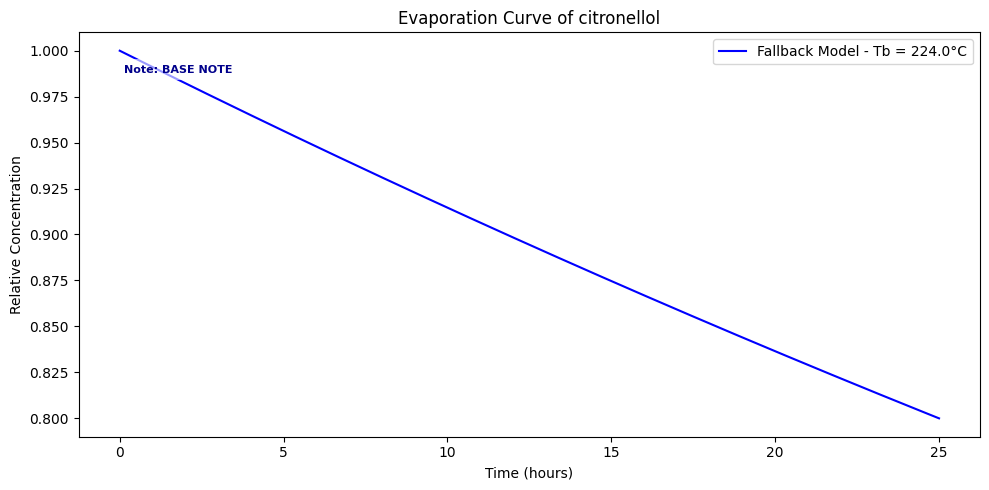

Perfume suitability summary:
👃 Smell detected.
⚠️ Not confirmed safe for skin contact.
✅ Acts as a **base note** (Pvap at 37°C: 0.01 mmHg).


In [2]:
from perfumeme.usable_in_perfume import usable_in_perfume
molecule = "citronellol"
summary = usable_in_perfume(molecule)
print(summary)


<div style="text-align: justify">
As shown on the graph, at t = 15 h the relative concentration is approximately 0.875, which shows that is a good molecule to have in a perfume because it stays for a long time. Furthermore, it is confirmed that it has a smell. Concerning the toxicity, it can be noted that it should be used at low concentrations. But what smell does it have? Awesome, the next function takes care of it!
</div>

<div style="text-align: justify">
Initially, the assumption was made that for a molecule to be used in perfumery, it must possess a detectable odor and be safe for dermal exposure. As a result, the early version of the function automatically excluded any compound that was either odorless or flagged as potentially toxic. However, this approach proved to be too restrictive. In practice, the fragrance industry sometimes incorporates molecules that serve functional or technical roles—such as fixatives, stabilizers, or solvents—even if they don't contribute directly to the scent profile or have some level of toxicity under specific conditions. Recognizing this, the logic of the function was revised to allow for a more flexible and realistic evaluation, acknowledging that the presence of an odor or complete safety is not always a prerequisite for a molecule's use in a perfume formulation. Indeed, for certain molecules, if they are diluted enough, they don't have the same same safety restrictions.
</div>

### 👃 What odor does it give in the perfume?
<div style="text-align: justify">
The function __odor_molecule_perfume__ answers this question. It will return a dictionnary which matches the given molecule to a selection of perfumes in which it is present, and which smell it gives the perfume. Two functions were defined for it, or to be used seperately if you just wish to know the scent of the molecule for example. These two functions are __match_molecule_to_perfumes__ and __match_mol_to_odor__.

First, the database __perfumes.json__ was manually created with 29 perfumes. This list is limited as there is no database with all the perfumes and their ingredients. There is also the fact that not all perfume makers provide the list of molecules used in their perfumes. A separate database, __molecules.json__, contains all the molecules that are contained in the perfumes. To each is associated their SMILES and their odor. The odor was found from an additional database found online, __withodors.csv__. This last database contains a lot of unnecessary molecules for this package, which justifies the choice of creating a smaller database was made. The functions used to create these databases are found in __scraper.py__. It also doesn't include any molecules which are odorlesss.

#### 🤝 Match molecule to perfume

The function __match_molecule_to_perfumes__ will return a list of the perfumes which contain this molecule. This function is not case sensitive. Below is an example usage.
</div>

In [2]:
from perfumeme.perfume_molecule import match_molecule_to_perfumes


# Find all perfumes containing Citronellol
citronellol_perfumes = match_molecule_to_perfumes("citronellol")
print(citronellol_perfumes)

['Aqua Allegoria Rosa Verde by Guerlain', 'Aqua Allegoria Nettare di Sole by Guerlain', 'Aqua Allegoria Mandarine Basilic by Guerlain', 'Alien by Mugler', 'Angel by Mugler', 'Chance by Chanel', 'Coco by Chanel', 'Coco Mademoiselle by Chanel', 'Dior Homme by Dior', 'Eau de Rochas by Rochas', 'Egoïste by Chanel', 'Flower by Kenzo', "J'adore by Dior", 'Jardins de Bagatelle by Guerlain', "L'eau d'Hadrien by Annick Goutal", "L'interdit by Givenchy", 'La Petite Robe Noir by Guerlain', 'Lady Million by Paco Rabanne', 'Libre by Yves Saint-Laurent', 'Miss Dior by Dior', 'N°5 by Chanel', 'Nina by Nina Ricci', 'Opium by Yves Saint Laurent', 'Shalimar by Guerlain', 'Si by Armani', "Terre d'Hermès by Hermès"]


#### 🧪 Match molecule to odor

The function __match_mol_to_odor__ returns a list which contains the odors of a given molecule. An example usage for this function:

In [3]:
from perfumeme.perfume_molecule import match_mol_to_odor

# Find all odors of citronellol
citronellol_odors = match_mol_to_odor("citronellol")
print(citronellol_odors)

['citrus', 'fatty', 'floral', 'geranium', 'green', 'leathery', 'rose', 'sweet', 'terpenic', 'wax']


#### ✨ Perfumes and scent

Below is an example of the usage of __odor_molecule_perfume__ for citronellol. 

In [9]:
from perfumeme.perfume_molecule import odor_molecule_perfume

molecule = "citronellol"
print (odor_molecule_perfume(molecule))

molecule = "linalool"
print (odor_molecule_perfume(molecule))

{'perfumes': ['Aqua Allegoria Rosa Verde by Guerlain', 'Aqua Allegoria Nettare di Sole by Guerlain', 'Aqua Allegoria Mandarine Basilic by Guerlain', 'Alien by Mugler', 'Angel by Mugler', 'Chance by Chanel', 'Coco by Chanel', 'Coco Mademoiselle by Chanel', 'Dior Homme by Dior', 'Eau de Rochas by Rochas', 'Egoïste by Chanel', 'Flower by Kenzo', "J'adore by Dior", 'Jardins de Bagatelle by Guerlain', "L'eau d'Hadrien by Annick Goutal", "L'interdit by Givenchy", 'La Petite Robe Noir by Guerlain', 'Lady Million by Paco Rabanne', 'Libre by Yves Saint-Laurent', 'Miss Dior by Dior', 'N°5 by Chanel', 'Nina by Nina Ricci', 'Opium by Yves Saint Laurent', 'Shalimar by Guerlain', 'Si by Armani', "Terre d'Hermès by Hermès"], 'odors': ['citrus', 'fatty', 'floral', 'geranium', 'green', 'leathery', 'rose', 'sweet', 'terpenic', 'wax']}
{'perfumes': ['Aqua Allegoria Rosa Verde by Guerlain', 'Aqua Allegoria Nettare di Sole by Guerlain', 'Aqua Allegoria Mandarine Basilic by Guerlain', 'Angel by Mugler', 'Ch

### 😥 Limitations of the module
<div style="text-align: justify">
The model classifies compounds into top, heart, or base notes primarily based on vapor pressure or boiling point. This approach doesn't account for the complex interactions and perceptions involved in fragrance development, potentially oversimplifying the classification. This model is approximate as there is not a lot of litterature to confirm the value of Pvap choosen for the different notes. Assumptions were therefore made. Improvements can definetly be made for a more precise outcome but of course if the lack of time wasn't an issue further researches can go in this part.  

The focus is on individual molecules without considering their behavior in mixtures, which is essential in perfumery. The synergistic effects and stability of compounds in a blend are not addressed.

The limitation for __odor_molecule_perfume__ is that there are only 29 perfumes listed in the database. Perfumes can always be added to it, but only manually. The molecules present in the newly added perfumes will then be automatically added to the __molecules.json__ database. The function __match_mol_to_odor__ only returns the odors of a molecule if it's in the database __molecules.json__. It is definetly possible to allow the user to add the molecule they insert to the database, if it's not yet present. This is an update that can be done in the future. However, __molecules.json__ contains all the molecule from __perfumes.json__, so if a user inputs a molecule which isn't in __molecules.json__ and so adds it to the databse, it won't be detected in a perfume.
</div>

## 👉 Conclusion

<div style="text-align: justify">
The PERFUMEme package provides an accessible and practical tool for evaluating the suitability of chemical compounds for use in perfumery. By integrating data from PubChem and applying criteria such as odor presence, dermal toxicity, and volatility, the package enables preliminary classification of molecules into fragrance note types (top, heart, or base). It also supports visual exploration through evaporation curves and simplifies molecular data extraction for further analysis. Furthermore, it presents, for a limited amount of perfumes, in which ones a molecule is used and its specified odor.

Throughout its development, key challenges such as inconsistent data structures on PubChem and rigid initial assumptions about odor and safety were successfully addressed through flexible code design and exception handling strategies. While the tool presents a valuable foundation for molecule screening and educational purposes, it is important to acknowledge its limitations—particularly the reliance on third-party data, simplified volatility modeling, the lack of mixture analysis, and the restrictions in the small database of perfumes.

To go further, one could incorporate functions and data to take into consideration the blend of molecules, to be able to give even more precise information on the molecules and their effect in a perfume.

In conclusion, PERFUMEme offers a thoughtful blend of chemical informatics and perfumery insight. It is best viewed as a helpful exploratory tool that complements, expert formulation knowledge and experimental validation in the fragrance development process.
</div>

## 📚 References
<div style="text-align: justify">
Alien Eau de Parfum Rechargeable | Parfum Femme | Mugler (no date). Available at: https://www.mugler.fr/parfum/parfum-femme/alien/alien-eau-de-parfum/M010401002.html#tab=ingr%C3%A9dients (Accessed: 14 May 2025).

Angel Eau de Parfum Rechargeable | Parfum Femme | Mugler (no date). Available at: https://www.mugler.fr/parfum/parfum-femme/angel/angel-eau-de-parfum/M010101003.html#tab=ingr%C3%A9dients (Accessed: 14 May 2025).

Aqua Allegoria ⋅ Mandarine Basilic - Eau de Toilette ⋅ GUERLAIN (no date). Available at: https://www.guerlain.com/ch/fr-ch/p/aqua-allegoria-mandarine-basilic---eau-de-toilette-P014394.html (Accessed: 14 May 2025).

Aqua Allegoria ⋅ Nettare Di Sole - Eau de Toilette ⋅ GUERLAIN (no date). Available at: https://www.guerlain.com/ch/fr-ch/p/aqua-allegoria-nettare-di-sole---eau-de-toilette-P014396.html (Accessed: 14 May 2025).

AQUA ALLEGORIA ⋅ Rosa Verde - Eau de Toilette ⋅ GUERLAIN (no date). Available at: https://www.guerlain.com/ch/fr-ch/p/aqua-allegoria-rosa-verde---eau-de-toilette-P014913.html (Accessed: 14 May 2025).

CHANEL (no date a) CHANCE EAU DE PARFUM VAPORISATEUR - 100 ml, CHANEL. Available at: https://www.chanel.com/ch-fr/parfums/p/126520/chance-eau-de-parfum-vaporisateur/ (Accessed: 14 May 2025).

CHANEL (no date b) COCO EAU DE PARFUM VAPORISATEUR - 100 ml, CHANEL. Available at: https://www.chanel.com/ch-fr/parfums/p/113530/coco-eau-de-parfum-vaporisateur/ (Accessed: 14 May 2025).

CHANEL (no date c) ÉGOÏSTE EAU DE TOILETTE ZERSTÄUBER – 100 ml, CHANEL. Available at: https://www.chanel.com/ch-de/parfum/p/114460/egoiste-eau-de-toilette-zerstauber/ (Accessed: 16 May 2025).

COCO MADEMOISELLE EAU DE PARFUM INTENSE VAPORISATEUR - 100 ml | CHANEL (no date). Available at: https://www.chanel.com/ch-fr/parfums/p/116660/coco-mademoiselle-eau-de-parfum-intense-vaporisateur/ (Accessed: 14 May 2025).

Dior Homme Original, composition parfum Christian Dior | Olfastory (no date). Available at: https://www.olfastory.com/parfum/dior-homme/composition/ (Accessed: 14 May 2025).

‘Eau de Rochas’ (no date) Rochas Site Officiel. Available at: https://www.rochas.com/fr/parfums/eau-de-rochas (Accessed: 15 May 2025).

Eau d’Hadrien - Eau de Parfum rechargeable (no date) Goutal. Available at: https://www.goutalparis.com/products/eau-d-hadrien-eau-de-parfum-feminin (Accessed: 15 May 2025).

J’adore Eau de Parfum : le parfum pour femme iconique | DIOR (no date). Available at: https://www.dior.com/fr_ch/beauty/products/jadore-eau-de-parfum-Y0998031.html (Accessed: 15 May 2025).

Kenzo Flower by Kenzo Eau de Parfum (no date) Import Parfumerie. Available at: https://www.impo.ch/fr/Parfums/Parfums-pour-femme/Parfum/Kenzo-Flower-by-Kenzo-Eau-de-Parfum-30ml/p/5061997 (Accessed: 15 May 2025).

La Nuit de L’Homme Eau de Parfum (no date) Yves Saint Laurent Beauty. Available at: https://www.yslbeauty.ch/fr_CH/fragrance/la-nuit-de-l-homme-eau-de-parfum/WW-50356YSL.html (Accessed: 15 May 2025).

La Nuit de L’Homme Eau de Parfum · EAU DE PARFUM | YSL Beauty (no date). Available at: https://www.yslbeauty.ch/fr_CH/fragrance/la-nuit-de-l-homme-eau-de-parfum/WW-50356YSL.html#tab=ingr%C3%A9dients (Accessed: 15 May 2025).

LA PETITE ROBE NOIRE ⋅ EAU DE PARFUM ⋅ GUERLAIN (no date). Available at: https://www.guerlain.com/ch/fr-ch/p/la-petite-robe-noire-eau-de-parfum-P011469.html (Accessed: 15 May 2025).

La Vie est Belle Parfum 50 ml ⋅ Lancôme (no date a) Lancôme. Available at: https://www.lancome.fr/parfum/parfum-femme/la-vie-est-belle/la-vie-est-belle/313013-LAC.html (Accessed: 15 May 2025).

La Vie est Belle Parfum 50 ml ⋅ Lancôme (no date b) Lancôme. Available at: https://www.lancome.fr/parfum/parfum-femme/la-vie-est-belle/la-vie-est-belle/313013-LAC.html (Accessed: 15 May 2025).

Lady Million | Eau de Parfum | Femmes | Rabanne France (no date). Available at: https://www.rabanne.com/fr/fr/fragrance/p/lady-million--000000000065187137 (Accessed: 15 May 2025).

LES LÉGENDAIRES ⋅ JARDINS DE BAGATELLE - EAU DE PARFUM ⋅ GUERLAIN (no date). Available at: https://www.guerlain.com/ch/fr-ch/p/les-legendaires-jardins-de-bagatelle---eau-de-parfum-P014309.html (Accessed: 15 May 2025).

Libre Eau De Parfum (no date). Available at: https://www.yslbeauty.ch/fr_CH/icones/best-sellers/libre-eau-de-parfum/WW-50424YSL.html#tab=ingr%C3%A9dients (Accessed: 15 May 2025).

L’interdit Givenchy • Eau de Parfum Femme (no date). Available at: https://www.givenchybeauty.com/on/demandware.store/Sites-givenchy-beauty-fr-Site/fr_FR/Product-Show?pid=F10100099&srsltid=AfmBOoo-qv_fuJRpOS3bt5I1keX_mgFNLxIz2UyL8_F-hRaaKvfgogz- (Accessed: 15 May 2025).

Miss Dior Parfum, parfum féminin fleuri, fruité et boisé | DIOR (no date). Available at: https://www.dior.com/fr_ch/beauty/products/miss-dior-parfum-Y0997166.html (Accessed: 15 May 2025).

Nina Le Parfum - Succombez à la tentation | Nina Ricci (no date). Available at: https://www.ninaricci.com/fr-fr/fragrance/product/nina-le-parfum (Accessed: 15 May 2025).

Opium Eau De Parfum Spray (no date) Yves Saint Laurent Beauty. Available at: https://www.yslbeauty.ch/fr_CH/parfums/parfum-femme/opium/opium-eau-de-parfum-spray/231YSL.html (Accessed: 15 May 2025).

SHALIMAR ⋅ EAU DE PARFUM ⋅ GUERLAIN (no date). Available at: https://www.guerlain.com/ch/fr-ch/p/shalimar-eau-de-parfum-P011355.html (Accessed: 15 May 2025).

Sì Eau De Parfum, fragrance parfumée à la rose | Armani beauty (no date) Giorgio Armani. Available at: https://www.armanibeauty.ch/parfums/parfums-pour-femme/si/si/AP35200.html (Accessed: 15 May 2025).

Terre d’Hermès Parfum - 75 ml | Hermès Suisse (no date). Available at: https://www.hermes.com/ch/fr/product/terre-d-hermes-parfum-V107757V0/ (Accessed: 15 May 2025).

Pred-O3 (no date). Available at: https://odor.rpbs.univ-paris-diderot.fr/data (Accessed: 13 May 2025).
The 8 Most Used Aroma Molecules in Niche Perfumery (no date) LES VIDES ANGES. Available at: https://www.videsanges.com/blogs/stories/the-8-most-used-aroma-molecules-in-niche-perfumery (Accessed: 3 May 2025).

The Most Common Perfume Ingredients from A-to-Z (no date) Byrdie. Available at: https://www.byrdie.com/common-perfume-ingredients-a-to-z-list-346106 (Accessed: 3 May 2025).

Silva, L.M.C. et al. (2022) ‘Study of the Thermodynamic Equilibrium of Fragrance Mixtures, Limonene, Linalool and Geraniol, using the Unifac and Cosmo-Sac Models and the Estimation of their Combined Properties in Binary, Ternary and Quaternary Mixtures’, American Journal of Engineering and Applied Sciences, 15(2), pp. 160–177. Available at: https://doi.org/10.3844/ajeassp.2022.160.177.
</div>